# Assignment 1 - Which p-values can you expect?

In this notebook I will develop and answer questions using python from assignment 1.

In [50]:
import numpy as np
from scipy.stats import ttest_ind

def calculate_p_values(mean, std, n, n_simulations):
    p = np.empty(n_simulations)
    y = np.tile(100, reps=n)
    for i in range(n_simulations):
        x = np.random.normal(loc=mean, scale=std, size=n)
        z = ttest_ind(a=x, b=y)

        p[i] = z.pvalue
        
    return p
    
n_simulations = 100000

mean_IQ_score = 106
std_IQ_score = 15
n = 51

p_values = calculate_p_values(mean_IQ_score, std_IQ_score, 26, n_simulations)

In [51]:
# statistical power
print("Statistical power: {}".format(sum(p_values < 0.05) / n_simulations))

Statistical power: 0.51942


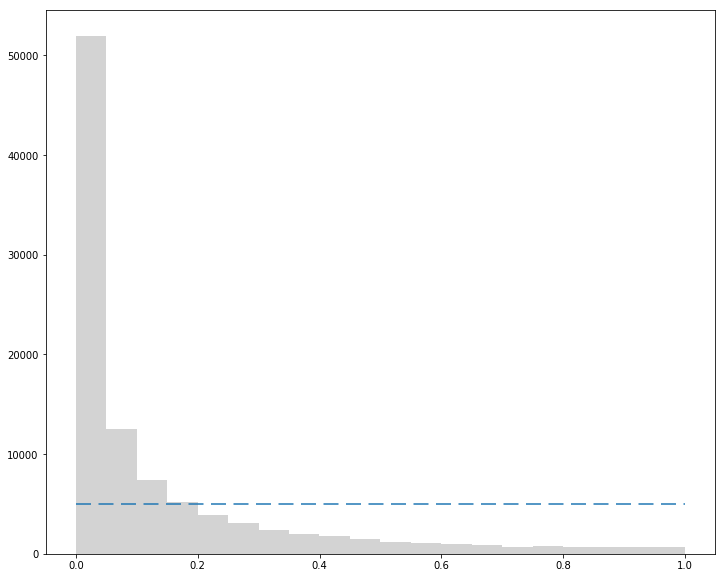

In [53]:
import pandas as pd

ax = pd.Series(p_values).hist(bins=20, figsize=(12, 10), color='lightgrey')
ax.grid(False)

ax.plot(np.linspace(0, 1, 500), np.tile(5000, reps=500), dashes=[10, 5, 10, 5],label='Dashes set proactively')

**Q1: Since the statistical power is the probability of observing a statistically significant
result, if there is a true effect, we can also see the power in the figure itself. Where?**

- A) We can calculate the number of p-values larger than 0.5, and divide them by the number of simulations.
- **B) We can calculate the number of p-values in the first bar (which contains all ‘significant’ p-values from 0.00 to 0.05) and divide the p-values in this bar by the total number of simulations.**
- C) We can calculate the difference between p-values above 0.5 minus the p-values below 0.5, and divide this number by the total number of simulations.
- D) We can calculate the difference between p-values above 0.5 minus the p-values below 0.05, and divide this number by the number of simulations. 

**Q2: Change the sample size in line 10 from n<-26 to n<-51. Run the simulation by selecting
all lines and pressing CTRL+Enter. What is the power in the simulation now that we have
increased the sample size from 26 people to 51 people?**

- A) 55% 
- B) 60% 
- **C) 80%**
- D) 95%

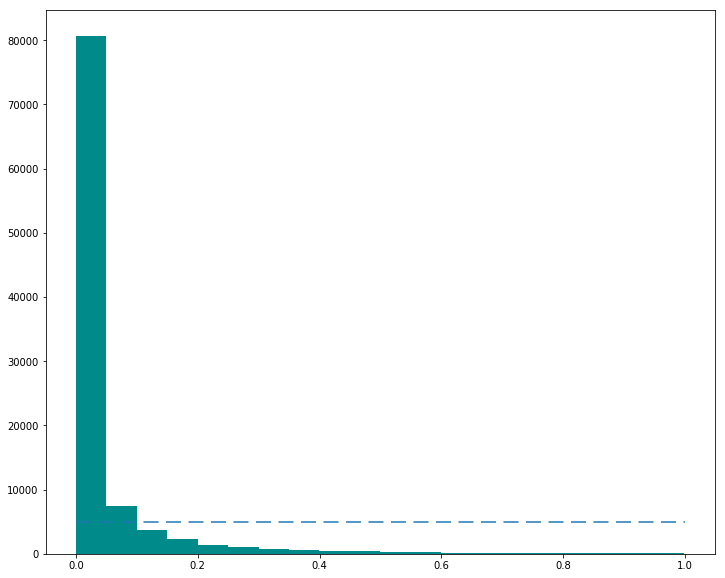

In [63]:
#p_values_51 = calculate_p_values(106, std_IQ_score, 51, n_simulations)

ax = pd.Series(p_values_51).hist(bins=20, figsize=(12, 10), color='darkcyan')
ax.grid(False)

bars = 20
ax.plot(np.linspace(0, 1, 500), np.tile(n_simulations/bars, reps=500), dashes=[10, 5, 10, 5],label='Dashes set proactively')

In [57]:
# statistical power
print("Statistical power: {}".format(sum(p_values_51 < 0.05) / n_simulations))

Statistical power: 0.80919


**Q3) If you look at the distribution of p-values, what do you notice?**

- A) The p-value distribution is exactly the same as with 50% power
- **B) The p-value distribution is much steeper than with 50% power**
- C) The p-value distribution is much flatter than with 50% power
- D) The p-value distribution is much more normally distributed than with 50% power

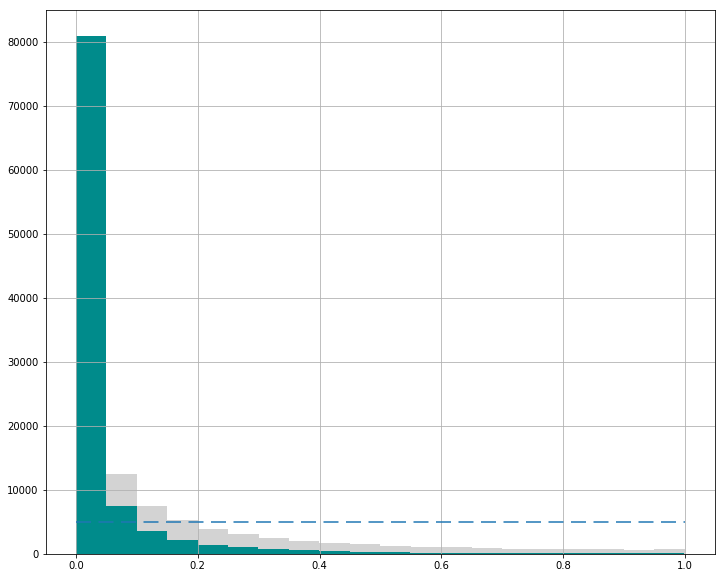

In [58]:
ax = pd.Series(p_values).hist(bins=20, figsize=(12, 10), color='lightgrey')
ax.plot(np.linspace(0, 1, 500), np.tile(5000, reps=500), dashes=[10, 5, 10, 5],label='Dashes set proactively')
ax.grid(False)

pd.Series(p_values_51).hist(bins=20, figsize=(12, 10), color='darkcyan');

**Q4) What would happen when there is no true difference between our simulated samples
and the average IQ score? In this situation, we have no probability to observe an effect,
so you might say we have ‘0 power’. Some people prefer to say power is not defined when
there is no true effect. I tend to agree, but we can casually refer to this as 0 power. Change
the mean IQ score in the sample to 100 (set M<-106 to M<-100 in line 9) There is now no
difference between the average IQ score, and the mean IQ in our simulated sample. Run the script again. What do you notice?**

- A) The p-value distribution is exactly the same as with 50% power
- B) The p-value distribution is much steeper than with 50% power
- **C) The p-value distribution is basically completely flat (ignoring some minor variation due to random noise in the simulation)**
- D) The p-value distribution is normally distributed

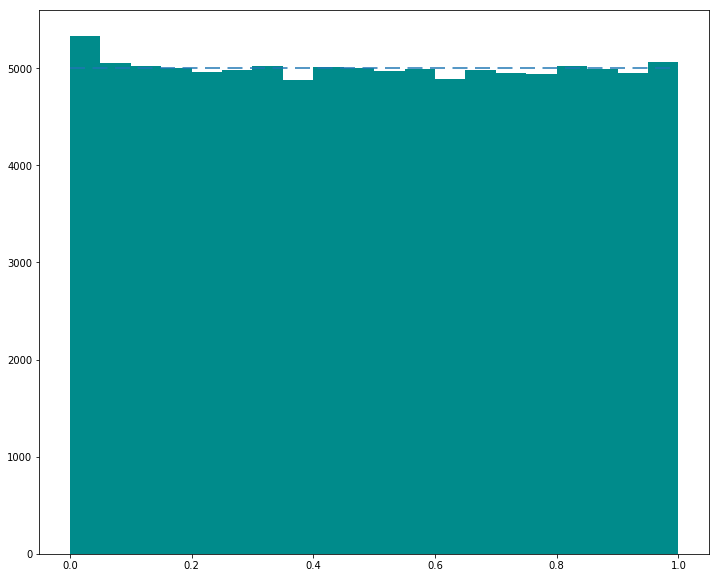

In [59]:
p_values_no_mean_difference = calculate_p_values(100, std_IQ_score, 51, n_simulations)

ax = pd.Series(p_values_no_mean_difference).hist(bins=20, figsize=(12, 10), color='darkcyan')
ax.grid(False)

ax.plot(np.linspace(0, 1, 500), np.tile(5000, reps=500), dashes=[10, 5, 10, 5],label='Dashes set proactively')

**Q5) Look at the leftmost bar in the plot, and look at the frequency of p-values in this bar
What is the formal name for this bar?**

- A) The power (or true positives)
- B) The true negatives
- C) **The Type 1 error (or false positives)**
- D) The Type 2 error (or false negatives)

(0, 1)

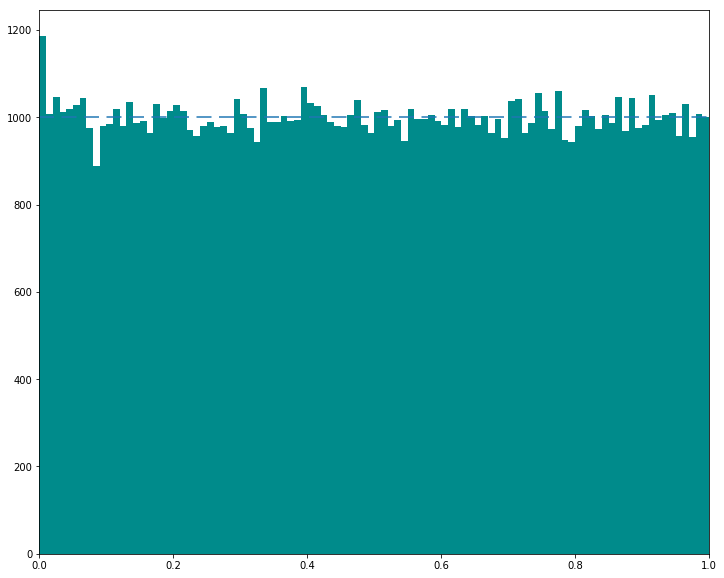

In [66]:
p_values_51 = calculate_p_values(100, std_IQ_score, 51, n_simulations)

bars = 100
ax = pd.Series(p_values_51).hist(bins=bars, figsize=(12, 10), color='darkcyan')
ax.grid(False)



ax.plot(np.linspace(0, 1, 500), np.tile(n_simulations/bars, reps=500), dashes=[10, 5, 10, 5],
        label='Dashes set proactively')

ax.set_xlim(0, 1)

(0, 1)

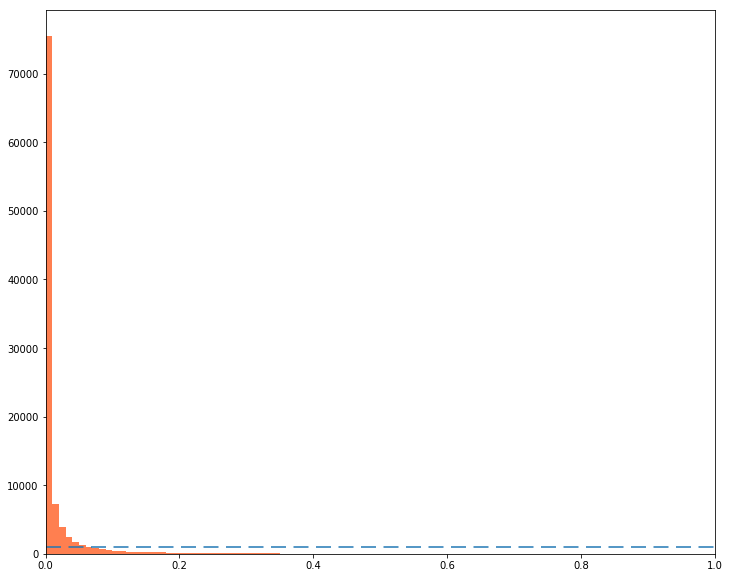

In [67]:
p_values_51 = calculate_p_values(107, std_IQ_score, 51, n_simulations)

bars = 100
ax = pd.Series(p_values_51).hist(bins=bars, figsize=(12, 10), color='coral')
ax.grid(False)



ax.plot(np.linspace(0, 1, 500), np.tile(n_simulations/bars, reps=500), dashes=[10, 5, 10, 5],
        label='Dashes set proactively')

ax.set_xlim(0, 1)

In [70]:
# statistical power
print("Statistical power: {}".format(sum(p_values_51 < 0.05) / n_simulations))

Statistical power: 0.90729


**Q6) The plot from the last simulation tells you we have 90.5% power. This is the power if
we use an alpha of 5%. But we can also use an alpha of 1%. What is the statistical power
we have in the simulated studies when we would use an alpha of 1%, looking at the graph?
Pick the answer closest to the answer from your simulations.**

- A) ~90%
- **B) ~75%**
- C) ~50%
- D) ~5%

(0, 10000)

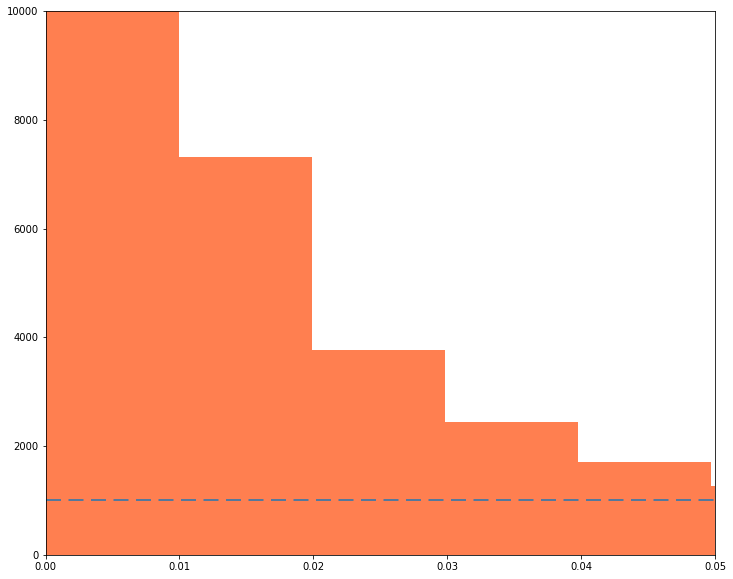

In [75]:
p_values_51 = calculate_p_values(107, std_IQ_score, 51, n_simulations)

bars = 100
ax = pd.Series(p_values_51).hist(bins=bars, figsize=(12, 10), color='coral')
ax.grid(False)



ax.plot(np.linspace(0, 1, 500), np.tile(n_simulations/bars, reps=500), dashes=[10, 5, 10, 5],
        label='Dashes set proactively')

ax.set_xlim(0, 0.05)
ax.set_ylim(0, 10000)

(0, 10000)

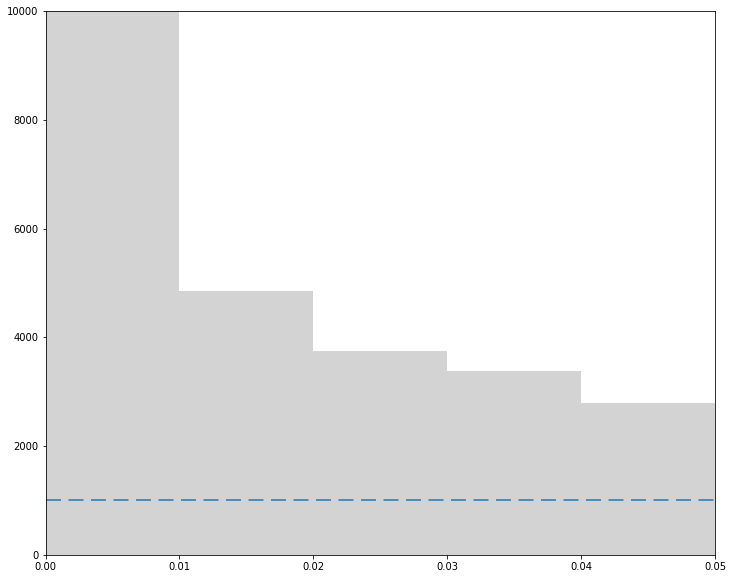

In [80]:
p_values_51 = calculate_p_values(105, std_IQ_score, 15, n_simulations)

bars = 100
ax = pd.Series(p_values_51).hist(bins=bars, figsize=(12, 10), color='lightgrey')
ax.grid(False)



ax.plot(np.linspace(0, 1, 500), np.tile(n_simulations/bars, reps=500), dashes=[10, 5, 10, 5],
        label='Dashes set proactively')

ax.set_xlim(0, 0.05)
ax.set_ylim(0, 10000)

**Q7) When you know you have very high (e.g., 98%) power for the smallest effect size you
care about, and you observe a p-value of 0.045, what is the correct conclusion?**

- A) The effect is significant, and provides strong support for the alternative hypothesis.
- B) The effect is significant, but it is without any doubt a Type 1 error.
- C) With high power, you should use an alpha level that is smaller than 0.05, and therefore, this effect can not be considered significant.
- **D) The effect is significant, but the data are more likely under the null hypothesis than under the alternative hypothesis.**

**Q8) Play around with the sample size and the mean IQ in the group (lines 9 and 10, and
thus, with the statistical power in the simulated studies). Look at the simulation result for
the bar that contains p-values between 0.04 and 0.05. The red line indicates how many
p-values would be found in this bar if the null-hypothesis was true (and is always at 1%).
At the very best, how much more likely is a p-value between 0.04 and 0.05 to come from
a p-value distribution representing a true effect, than it is to come from a p-value
distribution when there is no effect? You can answer this question by seeing how much
higher the bar of p-values between 0.04 and 0.05 can become. If at best the bar in the
simulation is five times as high at the red line (so the bar shows 5% of p-values end up
between 0.04 and 0.05, while the red line remains at 1%), then at best p-values between
0.04 and 0.05 are five times as likely when there is a true effect than when there is no
true effect.**

- A) At best, p-values between 0.04 and 0.05 are equally likely under the alternative hypothesis, and under the null hypothesis.
- **B) At best, p-values between 0.04 and 0.05 are approximately 4 times more likely under the alternative hypothesis, than under the null hypothesis.**
- C) At best, p-values between 0.04 and 0.05 are ~10 times more likely under the alternative hypothesis, than under the null hypothesis.
- D) At best, p-values between 0.04 and 0.05 are ~30 times more likely under the alternative hypothesis, than under the null hypothesis.